In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pmdarima as pmd
from scipy.ndimage import median_outlier_detection as median_outlier_detection_scipy
from scipy.stats import median_absolute_deviation as mad

C:\Users\ariel\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\ariel\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


ImportError: cannot import name 'median_outlier_detection' from 'scipy.ndimage' (C:\Users\ariel\Anaconda3\lib\site-packages\scipy\ndimage\__init__.py)

In [ ]:
pd.plotting.register_matplotlib_converters() # Volvemos a registrar los convertores.
plt.rcParams['figure.figsize'] = [16, 4]

In [ ]:
def median_outlier_detection(ds, window=5, threshold=5):
    rolling_median = ds.rolling(window, center=True).median()
    absolute_deviation = (ds - rolling_median).abs()
    spikes = (absolute_deviation > threshold)
    return spikes

In [ ]:
def double_diff_detection(ds, threshold=5):
    ds_d = ds.diff()
    ds_dd = ds.diff().diff()
    spikes = (ds_dd.abs() > threshold)
    return spikes

In [ ]:
orig_weather = pd.read_csv("../data/pronóstico_horario_abril_sept.csv", parse_dates=["fecha"], index_col="fecha")

In [ ]:
weather = orig_weather.copy()

In [ ]:
weather.loc[:, "hora"] = weather.index.hour
weather.loc[:, "dia"] = weather.index.day
weather.loc[:, "mes"] = weather.index.month

In [ ]:
weather = weather.asfreq("H")

In [ ]:
weather.temp = weather.temp.interpolate(limit=3)
spikes = median_outlier_detection(weather.temp, threshold=5)

In [ ]:
plt.plot(weather.temp)
plt.plot(weather.temp[spikes], 'r+')

In [ ]:
weather.presion = weather.presion.interpolate(limit=3)

In [ ]:
spikes = median_outlier_detection(weather.presion, threshold=5)

In [ ]:
plt.plot(weather.presion)
plt.plot(weather.presion[spikes], 'r+')

In [ ]:
weather.hum = weather.hum.interpolate(limit=3)

In [ ]:
spikes = median_outlier_detection(weather.hum, threshold=20)

In [ ]:
plt.plot(weather.hum)
plt.plot(weather.hum[spikes], 'r+')

In [ ]:
weather.loc[median_outlier_detection(weather.temp, threshold=5), "temp"] = np.nan
weather.temp = weather.temp.interpolate(limit=3)

In [ ]:
weather.temp.plot()

In [ ]:
ds = orig_weather.temp.copy()
rolling_median = ds.rolling(5, center=True).median()
absolute_deviation = (ds - rolling_median).abs()
sns.distplot(absolute_deviation.dropna(), kde=False)

In [ ]:
sns.distplot(absolute_deviation.dropna(), kde=False)
plt.ylim((0,10))

In [ ]:
ds = orig_weather.temp.copy()

In [ ]:
sns.distplot(ds.diff().abs().dropna(), kde=False)

In [ ]:
sns.distplot(ds.diff().abs().dropna(), kde=False)
plt.ylim(0,10)

In [ ]:
ds.plot(xlim=("2019-07-16", "2019-07-17"))

In [ ]:
ds.plot(xlim=("2019-0-16", "2019-07-17"))

In [ ]:
ds[ds.diff().abs() > 20]

In [ ]:
sns.distplot(ds.diff().diff().dropna(), kde=False)
plt.ylim(0,10)

In [ ]:
ds = ds.interpolate(limit=3)

In [ ]:
spikes = double_diff_detection(ds, threshold=15)

In [ ]:
ds[spikes]

(737249.0, 737260.0)

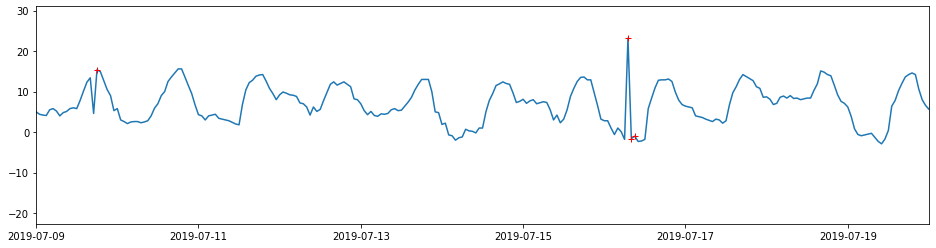

In [362]:
plt.plot(ds)
plt.plot(ds[spikes], 'r+')
#plt.xlim("2019-07-09", "2019-07-20")